# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [54]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


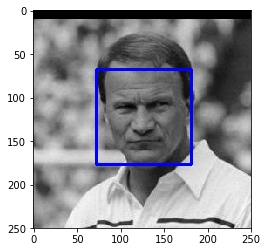

In [55]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[4])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [56]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [57]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
faces= np.vectorize(face_detector)

# detect the human in both sets
human_faces= faces(human_files_short)
h_face_percent= sum(human_faces)/len(human_faces)*100
dog_faces= faces(dog_files_short)
d_face_percent= sum(dog_faces)/len(dog_faces)*100

print('{} % of the faces were recognized as human faces'.format(h_face_percent))
    
print('{} % of the faces are recognized as the dog faces'.format(d_face_percent))


    
## on the images in human_files_short and dog_files_short.


98.0 % of the faces were recognized as human faces
17.0 % of the faces are recognized as the dog faces


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [58]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)
# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()
    print("Cuda is available. Training on GPU")
else:
    print("CUDA is not available.Training on the CPU")

Cuda is available. Training on GPU


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [62]:
from PIL import Image
import torchvision.transforms as transforms
from torch.autograd import Variable

def load_image(img_path):    
    image = Image.open(img_path).convert('RGB')
    # resize to (224, 224) as VGG16 accept this shape
    in_transform = transforms.Compose([
                        transforms.Resize(size=(224, 224)),
                        transforms.ToTensor()]) # normalizaiton parameters from pytorch doc.

    # discard the transparent, alpha channel (that's the :3) and add the squeeze dimension
    image = in_transform(image)[:3,:,:].unsqueeze(0)
    return image

    
def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    img = load_image(img_path)
    if use_cuda:
        img = img.cuda()
    index = VGG16(img)
    return torch.max(index,1)[1].item() # predicted class index


In [63]:
VGG16_predict(dog_files_short[0])

243

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [64]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    pred = VGG16_predict(img_path)
    
    return (pred<=268 and pred>=151)# true/false

print(dog_detector(human_files[0]))
print(dog_detector(dog_files[0]))

False
True


### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [9]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

fhuman_count=0
fdog_count=0

for i in range(100):
    #Test of the dogs
    if dog_detector(dog_files_short[i]):
        fdog_count+= 1
    if dog_detector(human_files_short[i]):
        fhuman_count+= 1
        
print("Percentage of Dogs detected in dog files {}%". format(fdog_count))
print("Percentage of human detected in human files {}%". format(fhuman_count))


Percentage of Dogs detected in dog files 96%
Percentage of human detected in human files 0%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [11]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [2]:
from sklearn.datasets import load_files       
from torchvision import datasets
import torchvision.transforms as transforms
from keras.utils import np_utils
import numpy as np
from glob import glob
from PIL import ImageFile
import os
ImageFile.LOAD_TRUNCATED_IMAGES = True

# define function to load train, test, and validation datasets

transform_train = transforms.Compose([
                                transforms.RandomResizedCrop(128),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                     std=[0.229, 0.224, 0.225])])
    
transform_test = transforms.Compose(
                                 [transforms.Resize(256),
                                 transforms.CenterCrop(128),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                      std=[0.229, 0.224, 0.225])])
def split_dataset(path):
    
    #Load text files with categories as subfolder names.
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

# transformation of the images
train_data= datasets.ImageFolder('/data/dog_images/train/',transform_train)
valid_data= datasets.ImageFolder('/data/dog_images/valid/',transform_test)
test_data= datasets.ImageFolder('/data/dog_images/test/',transform_test)
num_train= len(train_data.classes)


# specify the data loaders
train_loaders= torch.utils.data.DataLoader(train_data,batch_size=32, shuffle=True, num_workers=0)
valid_loaders= torch.utils.data.DataLoader(valid_data,batch_size=32, shuffle=True, num_workers=0)
test_loaders= torch.utils.data.DataLoader(test_data,batch_size=32, shuffle=True, num_workers=0)

loaders_scratch= {"train": train_loaders, "valid": valid_loaders, "test": test_loaders}

# load train, test, and validation datasets
train_files, train_targets = split_dataset('/data/dog_images/train')
valid_files, valid_targets = split_dataset('/data/dog_images/valid')
test_files, test_targets = split_dataset('/data/dog_images/test')


# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob("/data/dog_images/train/*/"))]

# detail of the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

Using TensorFlow backend.


There are 133 total dog categories.
There are 8351 total dog images.
There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


In [13]:
# defining the learning rate

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: Both of the RandomSizedCrop and the RandomHorizontalFlip is use to  perform the cropping and the image augmentation tasks. With image augmentation, the image dataset will be very random and prevents any of the overfitting in the model. In the same way, the image is crop to the 128 * 128 to make the training process easier.

Both images of valid_data and test_data undergo image resizing only, so that it can be used later for testing.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [74]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
    
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3,3,3,padding=1)
        self.conv2 = nn.Conv2d(3,6,3,padding=1)
        self.conv3 = nn.Conv2d(6,12,3,padding=1)
        self.conv4 = nn.Conv2d(12,12,3,padding=1)
        
        self.fc1 = nn.Linear(12*8*8,384)
        self.fc1_drop = nn.Dropout(p=0.25)
        self.fc2 = nn.Linear(384,133)
        
        self.bn1 = nn.BatchNorm2d(3)
        self.bn2 = nn.BatchNorm2d(6)
        self.bn3 = nn.BatchNorm2d(12)
        self.bn4 = nn.BatchNorm2d(12)
        

    def forward(self, x):
        ## Define forward behavior
        
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.max_pool2d(x,kernel_size=2, stride=2) # 64x64
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.max_pool2d(x,kernel_size=2, stride=2) # 32x32
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.max_pool2d(x,kernel_size=2, stride=2) # 16x16
        x = F.relu(self.bn4(self.conv4(x)))
        x = F.max_pool2d(x,kernel_size=2, stride=2) # 8x8
        x = x.view(-1,12*8*8)
        x = F.relu(self.fc1(x))
        x = self.fc2(self.fc1_drop(x))
        x = F.log_softmax(x,dim=0)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print(model_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=768, out_features=384, bias=True)
  (fc1_drop): Dropout(p=0.25)
  (fc2): Linear(in_features=384, out_features=133, bias=True)
  (bn1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn4): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [69]:
!pip install torchsummary

In [16]:
from torchsummary import summary
summary(model_scratch, input_size=(3,128,128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 3, 128, 128]              84
       BatchNorm2d-2          [-1, 3, 128, 128]               6
            Conv2d-3            [-1, 6, 64, 64]             168
       BatchNorm2d-4            [-1, 6, 64, 64]              12
            Conv2d-5           [-1, 12, 32, 32]             660
       BatchNorm2d-6           [-1, 12, 32, 32]              24
            Conv2d-7           [-1, 12, 16, 16]           1,308
       BatchNorm2d-8           [-1, 12, 16, 16]              24
            Linear-9                  [-1, 384]         295,296
          Dropout-10                  [-1, 384]               0
           Linear-11                  [-1, 133]          51,205
Total params: 348,787
Trainable params: 348,787
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.19
Forward/

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ <br> At first try, I frequently get the error of **"RuntimeError: cuda runtime error (2) : out of memory at /opt/conda/conda-bld/pytorch_1524586445097/work/aten/src/THC/generic/THCStorage.cu:58"** while trying the train the model. And, I manage somehow by decreasing the total size of my architecture. And finally with the Total Size of 2.88, the CNN model trains without any error.

<h3>Outline of the CNN architecture</h3>

Input Size: 128*128 pixel of RGB image

Kernel Size: 3 * 3 of the kernel size to capture the pixels small details

Batch Normalization:  At first, I use the Batch normalization at every CNN layers

Max-pooling layers: With the value of stride of 2 and the pixel size of 2, the max-pool layers reduce the value of parameter into half and only capture the very useful information.


**First CNN layer of size** #128 <br>
(conv1): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))<br>
**Second CNN layer of size** #64 <br>
(conv2): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))<br>
**Third CNN layer of size** #32 <br>
(conv3): (conv3): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1,1))<br>
**Fourth CNN layer of size** #16 <br>
(conv4): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))<br>



**(pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)**

Two of the fully-connected layers is used with the 384 (with dropout) and one with the 133 units which is same as total number of dog classes in our dataset.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [75]:
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau 
### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), 0.001)
## Adding learning rate
scheduler_scratch= ReduceLROnPlateau(optimizer_scratch,'min', verbose= True)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [18]:
import time

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            # intialize the weight to zero
            optimizer.zero_grad()
            
            output = model(data)
            ## find the loss and update the model parameters accordingly
            loss = criterion(output,target)
            # back propagation
            loss.backward()
            # gradient-step
            optimizer.step()
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            # forward pass
            output= model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            ## update the average validation loss
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
        
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(),save_path)
            # saving the model
            valid_loss_min= valid_loss
            
    # return trained model
    return model




In [31]:

# train the model
model_scratch = train(50, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')
# load the model that got the best validation accuracy

model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.801563 	Validation Loss: 4.575945
Epoch: 2 	Training Loss: 4.558741 	Validation Loss: 4.473050
Epoch: 3 	Training Loss: 4.457282 	Validation Loss: 4.440420
Epoch: 4 	Training Loss: 4.396412 	Validation Loss: 4.355129
Epoch: 5 	Training Loss: 4.339952 	Validation Loss: 4.383945
Epoch: 6 	Training Loss: 4.291797 	Validation Loss: 4.304070
Epoch: 7 	Training Loss: 4.239751 	Validation Loss: 4.291195
Epoch: 8 	Training Loss: 4.209555 	Validation Loss: 4.250998
Epoch: 9 	Training Loss: 4.162045 	Validation Loss: 4.230072
Epoch: 10 	Training Loss: 4.164371 	Validation Loss: 4.185108
Epoch: 11 	Training Loss: 4.137126 	Validation Loss: 4.125089
Epoch: 12 	Training Loss: 4.109890 	Validation Loss: 4.138760
Epoch: 13 	Training Loss: 4.082276 	Validation Loss: 4.074584
Epoch: 14 	Training Loss: 4.046724 	Validation Loss: 4.043249
Epoch: 15 	Training Loss: 3.995785 	Validation Loss: 4.097067
Epoch: 16 	Training Loss: 3.983051 	Validation Loss: 4.018316
Epoch: 17 	Traini

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [17]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))


In [32]:


# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.776101


Test Accuracy: 13% (109/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [14]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
import os
import numpy as np
import torch
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models

import matplotlib.pyplot as plt                        
%matplotlib inline

from PIL import Image, ImageFile 
ImageFile.LOAD_TRUNCATED_IMAGES = True
# how many samples per batch to load
batch_size = 16

# number of subprocesses to use for data loading
num_workers = 2

# convert data to a normalized torch.FloatTensor
transform = transforms.Compose([transforms.Resize(size=224),
                                transforms.CenterCrop((224,224)),
                                transforms.RandomHorizontalFlip(), # randomly flip and rotate
                                transforms.RandomRotation(10),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

# define training, test and validation data directories
data_dir = '/data/dog_images/'

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), transform)
                  for x in ['train', 'valid', 'test']}
loaders_transfer = {
    x: torch.utils.data.DataLoader(image_datasets[x], shuffle=True, batch_size=batch_size, num_workers=num_workers)
    for x in ['train', 'valid', 'test']}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [19]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 

model_transfer = models.resnet50(pretrained=True)


# Freeze parameters 
for param in model_transfer.parameters():
    param.requires_grad = False

model_transfer.fc = nn.Linear(model_transfer.fc.in_features,133)


print(model_transfer)
    
if use_cuda:
    model_transfer = model_transfer.cuda()




ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer: <br> **Resnet50** is one of the powerful architecture that effectively implement the batch normalization to train faster than other architecture, and also already been trained in the large dataset.

Resnet50 is very effective to use since it have 50 residual network and solve most of complicated problem in the computer vision. In the research paper I read, it is suggested that the ResNet50 gain the better accuracy in most of the cases than that of the VGG16.(He, Zhang, Ren & Sun, 2015)

As the Resnet50 model was intially trained in the ImageNet dataset, so it won't help much in the dog classification task. So, to make fit in our dataset, the clasifier (133 classes of the dog) of our dataset must be replace. 

References <br>
He, K., Zhang, X., Ren, S., & Sun, J. (2015). Deep Residual Learning for Image Recognition.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [20]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = torch.optim.Adam(model_transfer.fc.parameters(),lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [22]:
# train the model
model_transfer = train(10, loaders_transfer, model_transfer, 
optimizer_transfer,criterion_transfer, use_cuda, 'model_transfer.pt')
# load the model that got the best validation accuracy

model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 0.365800 	Validation Loss: 0.621515
Epoch: 2 	Training Loss: 0.346384 	Validation Loss: 0.595247
Epoch: 3 	Training Loss: 0.349186 	Validation Loss: 0.639260
Epoch: 4 	Training Loss: 0.347979 	Validation Loss: 0.764433
Epoch: 5 	Training Loss: 0.330261 	Validation Loss: 0.640258
Epoch: 6 	Training Loss: 0.301917 	Validation Loss: 0.633549
Epoch: 7 	Training Loss: 0.285519 	Validation Loss: 0.676583
Epoch: 8 	Training Loss: 0.303156 	Validation Loss: 0.629160
Epoch: 9 	Training Loss: 0.278950 	Validation Loss: 0.683713
Epoch: 10 	Training Loss: 0.318762 	Validation Loss: 0.679725


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [23]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.665959


Test Accuracy: 83% (695/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [66]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in image_datasets['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    img_tensor= load_image(img_path)
    # moving the model to cuda if available
    if use_cuda:
        img_tensor= img_tensor.cuda()
    # get the sample of output
    output= model_transfer(img_tensor)
    # convert output into the probabilities
    _, preds_tensor= torch.max(output,1 )
    pred= np.squeeze(preds_tensor.numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())
    return class_names[pred]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [65]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def image(img_path, title="Title"):
    image = Image.open(img_path)
    plt.title(title)
    plt.imshow(image)
    plt.show()

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    if (face_detector(img_path)):
        print("The image is of the human")
        predicted_breed= predict_breed_transfer(img_path)
        image(img_path, title="Predicted:{}".format(predicted_breed))
        print("Human look like {}".format(predicted_breed))
    elif dog_detector(img_path):
        print("The image is of the dog")
        predicted_breed= predict_breed_transfer(img_path)
        image(img_path, title="Predicted:{}".format(predicted_breed))
        print("You dog likely to be {}".format(predicted_breed))
    else:
        print("I can't recognize the image. Please try another image")


    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

<h5> The algorithm works well when single object is fed into the algorithm but make the bad prediction when there is two object  in the same image. The model can be finely tune to handle both the human and dog in the same image </h5> 

<h5> Most of time, the algorithm in my case predict '**Bichon frise**', the closest breed of human face resemble to. It can improve by feeding only the area of human faces to the algorithm while predicting most resembling dog breed. </h5>

<h5> Can be finely tune the model to make better prediction of dog breeds </h5>

The image is of the human


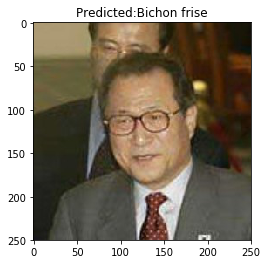

Human look like Bichon frise
The image is of the human


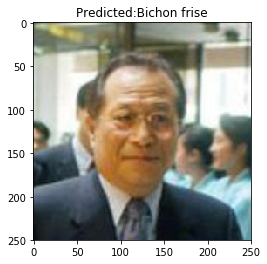

Human look like Bichon frise
The image is of the human


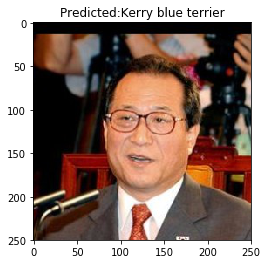

Human look like Kerry blue terrier
The image is of the human


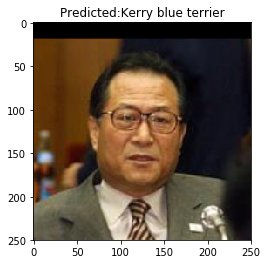

Human look like Kerry blue terrier
The image is of the human


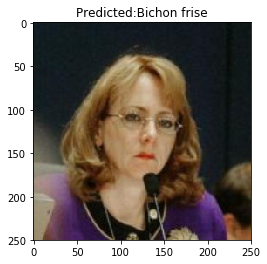

Human look like Bichon frise
The image is of the dog


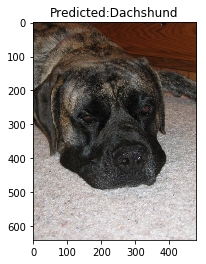

You dog likely to be Dachshund
The image is of the dog


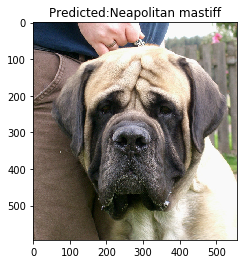

You dog likely to be Neapolitan mastiff
The image is of the dog


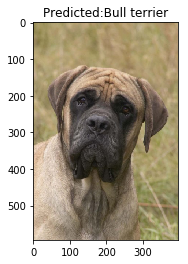

You dog likely to be Bull terrier
The image is of the dog


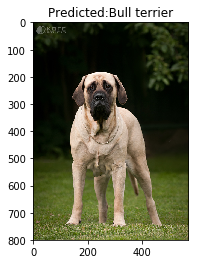

You dog likely to be Bull terrier
The image is of the dog


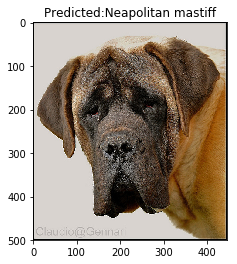

You dog likely to be Neapolitan mastiff


In [67]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files_short[10:15], dog_files_short[10:15])):
    run_app(file)